In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

# Непрерывные распределения 

## Равномерное распределение


Непрерывное равномерное распределение описывает равновероятность всех событий, поэтому оно часто используется, когда нет данных, а распределение служит бейслайном. Так же распределение активно используется в функции FPR в контроле АБ тестирования.
Нам неизвестно ничего кроме начала и конца функции.<br>
Поэтому случайная величина X имеет равномерное распределение на отрезке $[a,b]$, c функцие плотности вероятности:

$$
f_X(x) = 
\begin{cases}
\frac{1}{b - a}, & x \in [a, b] \\
0, & x \notin [a, b]
\end{cases}
$$
$$
f_X(x) = 
\begin{cases}
\frac{x-a}{b - a}, & x \in [a, b] \\
0, & x \notin [a, b]
\end{cases}
$$
Функция обозначается: $U=(a,b)$<br>
Мат. ожидание, и дисперсия: $$E[X]=\frac{a+b}{2};D[X]=\frac{(b-a)^2}{12}$$

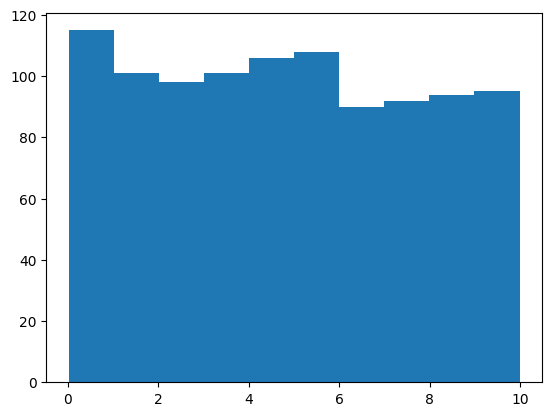

In [22]:
#симуляция выборки из равномерного распределения.
a = 0
b = 10
n_size = 1000
X = ss.uniform(loc=a,scale=b)
X_vals = X.rvs(n_size)
plt.hist(X_vals,bins=10);

In [23]:
# теоритическое мат.ожидание, и ст. отклонение
mu = (a + b) / 2
sigma = (b - a) / np.sqrt(12)

print('Среднее: ', mu)
print('Стандартное отклонение: ', round(sigma,3))

Среднее:  5.0
Стандартное отклонение:  2.887


Чем больше данных есть в выборке, тем ближе выборочная дисперсия будет приближаться к теоритической. Часто на данных смотрят именно выборочные метрики, но, если мы хотим смоделировать показатели, то нужно использовать именно теоритические функции дисперсии равномерного распределения. Покажем наглядно на графике:

/home/sergei/projects_mb/env/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/sergei/projects_mb/env/lib/python3.12/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/sergei/projects_mb/env/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


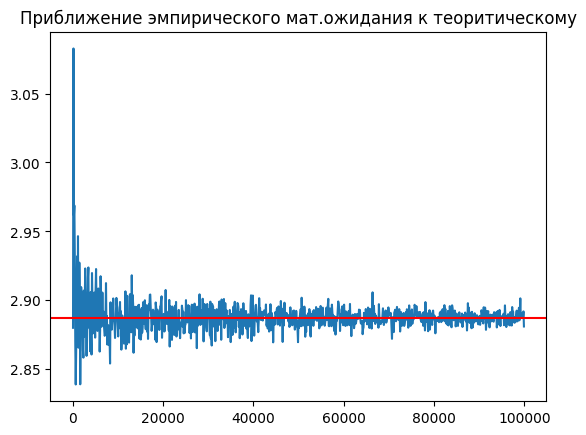

In [24]:
x =  np.arange(0,100000,100)
sample_means = [np.std(X.rvs(i),ddof=1) for i in x]
plt.plot(x,sample_means)
plt.title('Приближение эмпирического мат.ожидания к теоритическому')
plt.axhline(y=sigma, color='red', linestyle='-')

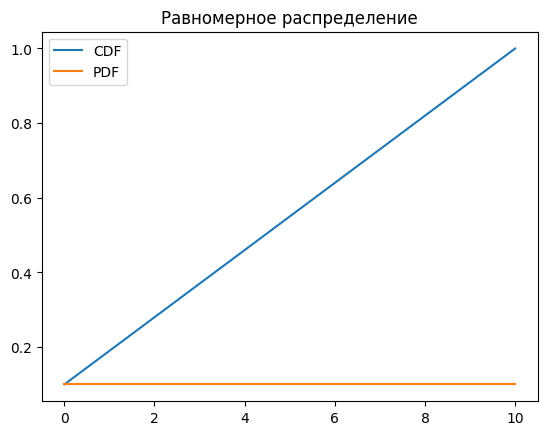

In [25]:
x = np.linspace(a, b, 10)
y_cdf = [X.cdf(v) for v in range(1, b+1)]
y_pdf = [X.pdf(v) for v in range(1, b+1)]

plt.title('Равномерное распределение')
plt.plot(x, y_cdf, label='CDF')
plt.plot(x, y_pdf, label='PDF')
plt.legend()
plt.show()

## Экспоненциальное (показательное) распределение

Закон экспоненциального распределения один из самых встречаемых в продуктовой аналитике. Сколько товаров в корзине, сколько пользователей потратил денег в игре, время ответа сервера.

Экспоненциальное распределение моделирует время между событиями в **пуассоновском процессе**, а параметр $\lambda$ — интенсивность (сколько событий в среднем происходит за единицу времени).

Функция плотности вероятности:
$$
f_X(x) = 
\begin{cases} 
\lambda e^{-\lambda x}, & x \geq 0 \\
0, & x < 0
\end{cases}
$$
Функция распределения:
$$
F_X(x) = 
\begin{cases} 
1 - e^{-\lambda x}, & x \geq 0 \\
0, & x < 0
\end{cases}
$$

Распределение имеет один параметр $\lambda$, Который определяет начальную точку на оси Y в плотности распределения, а также скорость уменьшения функции. Чем больше лямбда, тем выше график, но и быстрее уменьшается значение функции.

Характеристики:$$E(X)=\frac{1}{\lambda},D[X]=\frac{1}{\lambda^2}$$
Примечательно, что $\sigma=E(X)$.

0.6879336705725971

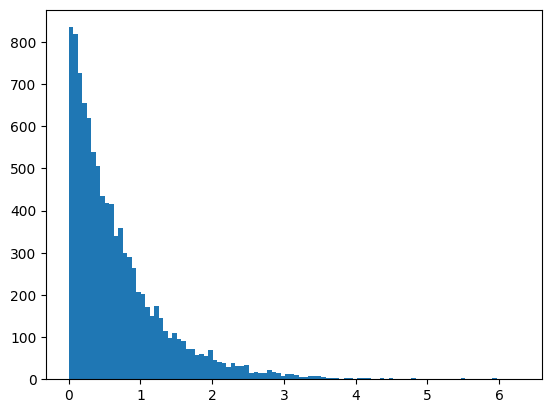

In [26]:
# создание выборки для примера
n_size = 10000
mu = 0.7 # среднее выборки

Lambda = 1 / mu # параметр эксп.распределения
X = ss.expon(scale=1/Lambda) # 1/lambda и есть mu
X_vals = X.rvs(n_size)

display(np.mean(X_vals))
plt.hist(X_vals,bins=100);

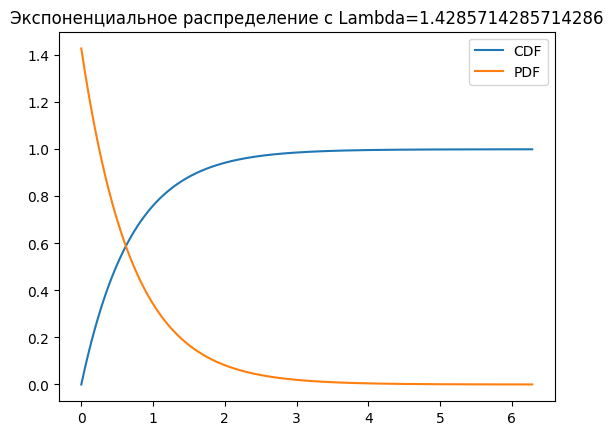

In [27]:
x = np.linspace(min(X_vals), max(X_vals), len(X_vals))
y_cdf = [X.cdf(v) for v in x]
y_pdf = [X.pdf(v) for v in x]

plt.title(f'Экспоненциальное распределение c Lambda={Lambda}')
plt.plot(x, y_cdf, label='CDF')
plt.plot(x, y_pdf, label='PDF')
plt.legend()
plt.show()

## Нормальное (Гаусса) распределение
Самое используемое распреледеление и влиятельное распределение, которое описывает поведение средних из генеральной совокупности (ЦПТ), соответственно используется в АБ тестах. 

Функция плотности вероятности:

$$
f_X(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$
Функция распределения:
$$
F_X(x) = \frac{1}{2} \left[ 1 + \operatorname{erf} \left( \frac{x - \mu}{\sqrt{2\sigma^2}} \right) \right]
$$
Нормально распределение имеет два параметра $\mu$ - отвечает за положение экстремума в функции плотности, и $\sigma$ - отвечает за ширину и высоту.

Характеристики:$$E[X]=\mu, D[X]=\sigma^2$$

Особенность нормального распределения в том, что его параметры — это характеристики, а характеристики — параметры.

0.0011082668811804187

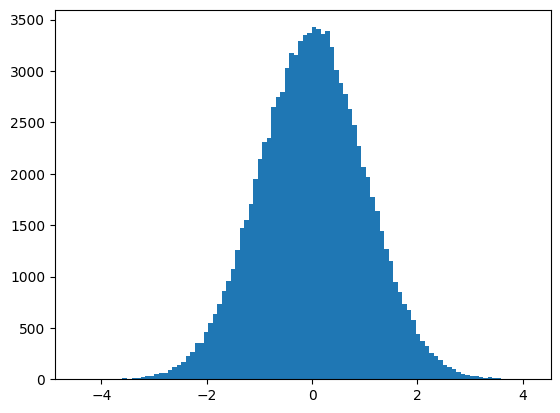

In [28]:
mu = 0 # Параметр mu
sigma = 1 # Параметр sigma
n_size = 100000
X = ss.norm(loc = mu, scale = sigma)
X_vals = X.rvs(n_size)

display(np.mean(X_vals))
plt.hist(X_vals,bins=100);

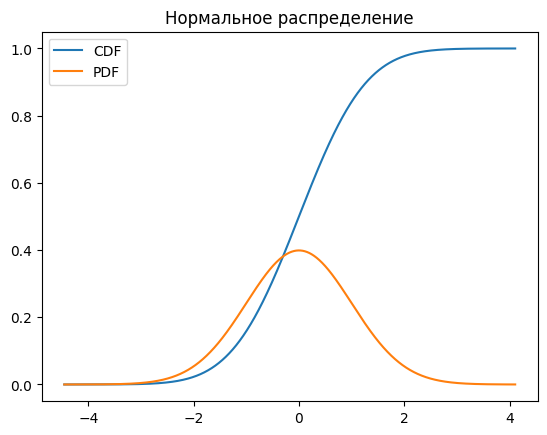

In [29]:
x = np.linspace(min(X_vals), max(X_vals), len(X_vals))
y_cdf = [X.cdf(v) for v in x]
y_pdf = [X.pdf(v) for v in x]

plt.title(f'Нормальное распределение')
plt.plot(x, y_cdf, label='CDF')
plt.plot(x, y_pdf, label='PDF')
plt.legend()
plt.show()

## Логнормальное распределение

 Название распределения говорит само за себя. Суть его в том, в том, что если логорифмировать данное распределение, то оно станет нормальным. Если величина $X∼LogN(μ, σ2)$, то величина $Y=ln(X)$ распределена $Y∼N(μ, σ2)$. В обратную сторону это тоже работает: если $X∼N(μ, σ2)$, то величина $Y=exp(X)$ распределена $Y∼LogN(μ, σ2)$.

Функция плотности вероятности:
$$
f_X(x) = 
\begin{cases} 
\frac{1}{x \sigma \sqrt{2\pi}} \exp\left(-\frac{(\ln x - \mu)^2}{2\sigma^2}\right), & x > 0 \\
0, & x \leq 0
\end{cases}
$$
Функция распределения:
$$
F_X(x) = 
\begin{cases} 
\Phi\left(\frac{\ln x - \mu}{\sigma}\right), & x > 0 \\
0, & x \leq 0
\end{cases}
$$

Нужно помнить, что $ln⁡E[ξ]≠E[ln⁡ξ]$  - логарифм мат. ожидания случайной величины не равен мат.ожиданию логарифма случайной величины. Поэтому нельзя залогорифмировать и оценить мат.ожидание логарифмированной выборки, а потом с помощью экспоненты вернуться к родным значениям, чтобы получить мат.ожидание.
Логорифмирование в случае данного распределения используется там, где выборка должна быть распределена нормально, например, линейные задачи.
Также логорифмирование хорошо справляется с выбросами, если распределение имеет правостороннюю асимметрию. Оно эффективно сжимает большие значения, тем самым снижая влияние выбросов, особенно если выбросы связаны с экспоненциальными эффектами.

Характеристики:

$$
\mathbb{E}[X] = e^{\mu + \frac{\sigma^2}{2}}
$$
$$
\mathrm{Var}(X) = \left(e^{\sigma^2} - 1\right) e^{2\mu + \sigma^2}
$$


1.1420979799140079

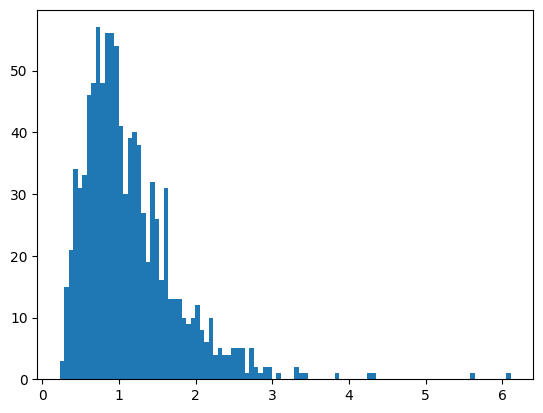

In [84]:
mu = 1 # Параметр mu
sigma = 1/2 # Параметр sigma
n_size = 1000
X = ss.lognorm(scale = mu, s = sigma)
X_vals = X.rvs(n_size)

display(np.mean(X_vals))
plt.hist(X_vals,bins=100);

0.005809425420182722

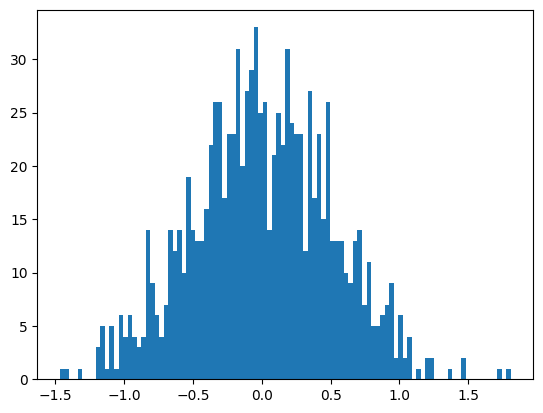

In [85]:
#логорифмированная выборка
X_vals_log = np.log(X_vals)
display(np.mean(X_vals_log))
plt.hist(X_vals_log,bins=100);

In [86]:
# найдем мат. ожидание и дисперсию
m = np.mean(X_vals_log)
s = np.std(X_vals_log)

E = np.exp(m+s**2/2) # матожидание
V = (np.exp(s**2)-1)*np.exp(2*m+sigma**2) # дисперсия
print(f'E:{E}, Var:{V}')

# проверить через scipy
# X.std()**2
# X.mean()

E:1.1415445712470835, Var:0.3742130241905257


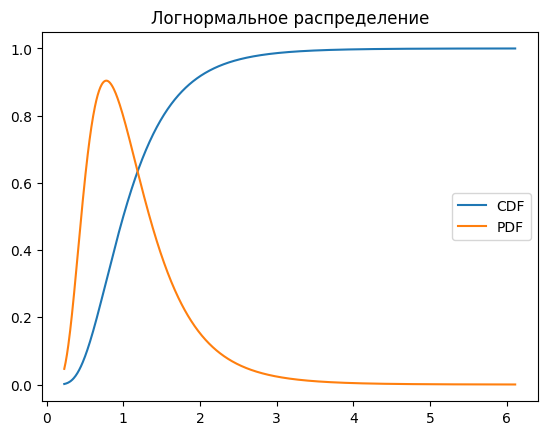

In [88]:
x = np.linspace(min(X_vals), max(X_vals), len(X_vals))
y_cdf = [X.cdf(v) for v in x]
y_pdf = [X.pdf(v) for v in x]

plt.title(f'Логнормальное распределение')
plt.plot(x, y_cdf, label='CDF')
plt.plot(x, y_pdf, label='PDF')
plt.legend()
plt.show()